In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
data = pd.read_csv(r'C:\Users\thaku\Desktop\mcu dataset.csv')

In [3]:
data.head()

,Name,US release Date,Director,Producer,Duration,Genre,IMDB rating,metascore,Cast,Budget,Domestic Gross,Total Gross,Opening Gross,Oscar Nomination,Oscar won,Phase
0,Iron Man,"May 2, 2008",Jon Favreau,Avi Arad and Kevin Feige,2h 6min,"Action , Adventure, Sci-Fi",7.9,79,"Robert Downey Jr. , Gweneth Paltrow , Terrence...","$140,000,000","$318,604,126","$585,366,247","$98,618,668",2,0,1
1,The incredible Hulk,"June 13, 2008",Louis Leterrier,"Avi Arad ,Gale Ann Hurd and Kevin Feige",1h 52min,"Action , Adventure, Sci-Fi",6.6,61,"Edward Norton , Liv Tyler , Tim Roth","$150,000,000","$134,806,913","$264,770,996","$55,414,050",0,0,1
2,Iron Man 2,"May 7, 2010",Jon Favreau,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",7.0,57,"Robert Downey Jr. , Gweneth Paltrow , Mickey R...","$200,000,000","$312,433,331","$623,933,331","$128,122,480",1,0,1
3,Thor,"May 6, 2011",Kenneth Branagh,Kevin Feige,1h 55min,"Action , Adventure, Fantasy",7.0,57,"Chris Hemsworth , Anthony Hopkins , Natalie Po...","$150,000,000","$181,030,624","$449,326,618","$65,723,338",0,0,1
4,Captain America: The first Avenger,"July 22, 2011",Joe Jhonston,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",6.9,66,"Chris Evans , Hugo Weaving , Samuel L. Jackson","$140,000,000","$176,654,505","$370,569,774","$65,058,524",0,0,1


### Explore Data

In [4]:
data.describe()

,IMDB rating,metascore,Oscar Nomination,Oscar won,Phase
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,7.443478,68.652174,0.826087,0.130435,2.217391
std,0.508854,7.906319,1.497033,0.625543,0.850482
min,6.600000,54.000000,0.000000,0.000000,1.000000
25%,7.000000,64.000000,0.000000,0.000000,1.500000
50%,7.400000,69.000000,0.000000,0.000000,2.000000
75%,7.850000,73.500000,1.000000,0.000000,3.000000
max,8.400000,88.000000,7.000000,3.000000,3.000000


In [5]:
data.head()

,Name,US release Date,Director,Producer,Duration,Genre,IMDB rating,metascore,Cast,Budget,Domestic Gross,Total Gross,Opening Gross,Oscar Nomination,Oscar won,Phase
0,Iron Man,"May 2, 2008",Jon Favreau,Avi Arad and Kevin Feige,2h 6min,"Action , Adventure, Sci-Fi",7.9,79,"Robert Downey Jr. , Gweneth Paltrow , Terrence...","$140,000,000","$318,604,126","$585,366,247","$98,618,668",2,0,1
1,The incredible Hulk,"June 13, 2008",Louis Leterrier,"Avi Arad ,Gale Ann Hurd and Kevin Feige",1h 52min,"Action , Adventure, Sci-Fi",6.6,61,"Edward Norton , Liv Tyler , Tim Roth","$150,000,000","$134,806,913","$264,770,996","$55,414,050",0,0,1
2,Iron Man 2,"May 7, 2010",Jon Favreau,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",7.0,57,"Robert Downey Jr. , Gweneth Paltrow , Mickey R...","$200,000,000","$312,433,331","$623,933,331","$128,122,480",1,0,1
3,Thor,"May 6, 2011",Kenneth Branagh,Kevin Feige,1h 55min,"Action , Adventure, Fantasy",7.0,57,"Chris Hemsworth , Anthony Hopkins , Natalie Po...","$150,000,000","$181,030,624","$449,326,618","$65,723,338",0,0,1
4,Captain America: The first Avenger,"July 22, 2011",Joe Jhonston,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",6.9,66,"Chris Evans , Hugo Weaving , Samuel L. Jackson","$140,000,000","$176,654,505","$370,569,774","$65,058,524",0,0,1


In [6]:
##Converting data types for outliers

def remove_symbol(var):
    s=var[1:]
    s.replace(',','')
    return s

In [7]:
data['Budget']=data['Budget'].apply(remove_symbol).str.replace(',','').astype(float)
data['Domestic Gross']=data['Domestic Gross'].apply(remove_symbol).str.replace(',','').astype(int)
data['Total Gross']=data['Total Gross'].apply(remove_symbol).str.replace(',','').astype(float)
data['Opening Gross']=data['Opening Gross'].apply(remove_symbol).str.replace(',','').astype(float)

In [8]:
data.columns

Index(['Name', 'US release Date', 'Director', 'Producer', 'Duration', 'Genre',
       'IMDB rating', 'metascore', 'Cast', 'Budget', 'Domestic Gross',
       'Total Gross', 'Opening Gross', 'Oscar Nomination', 'Oscar won',
       'Phase'],
      dtype='object')

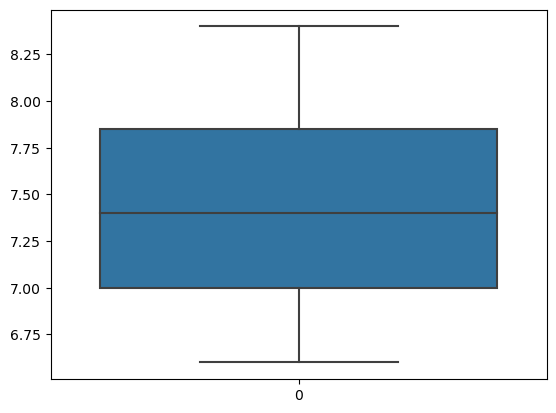

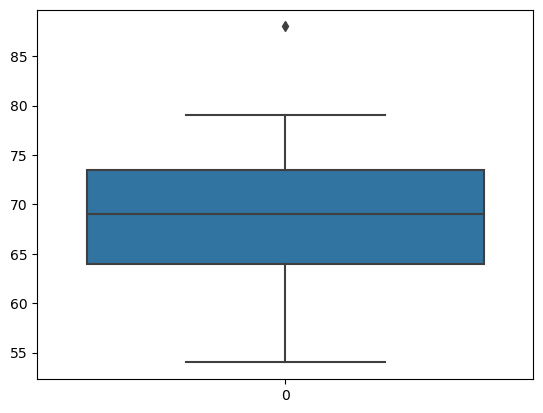

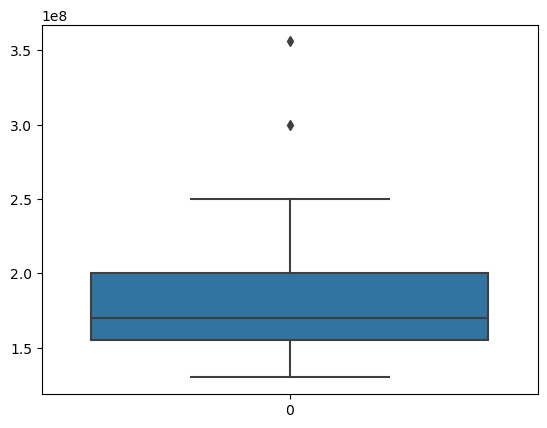

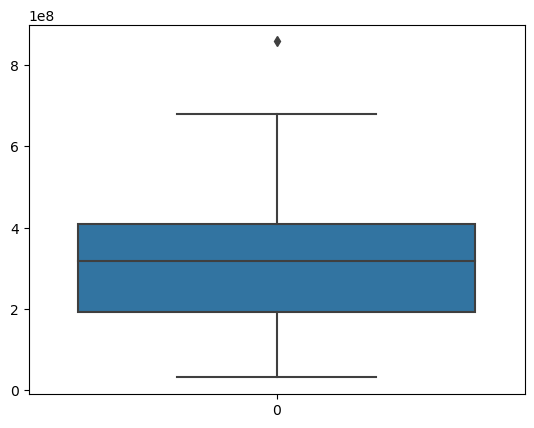

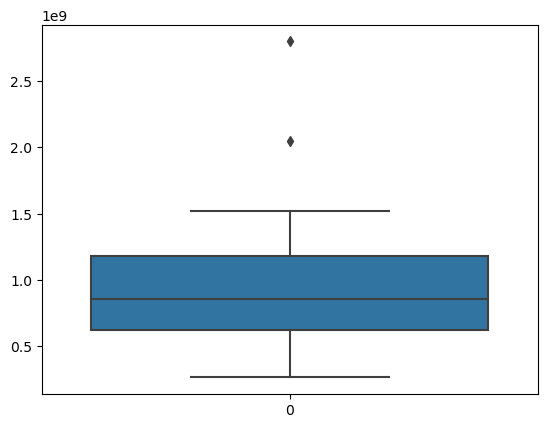

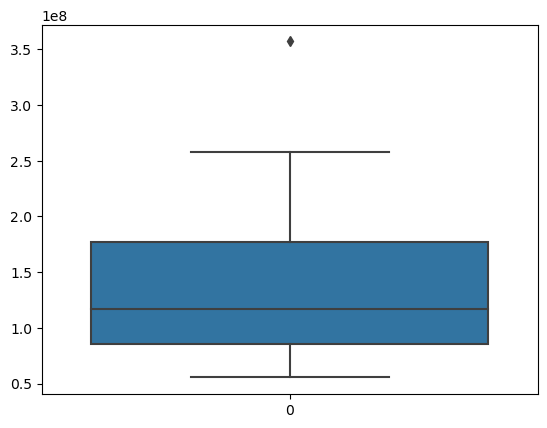

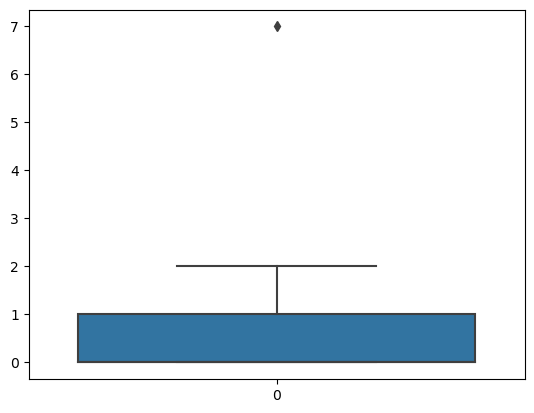

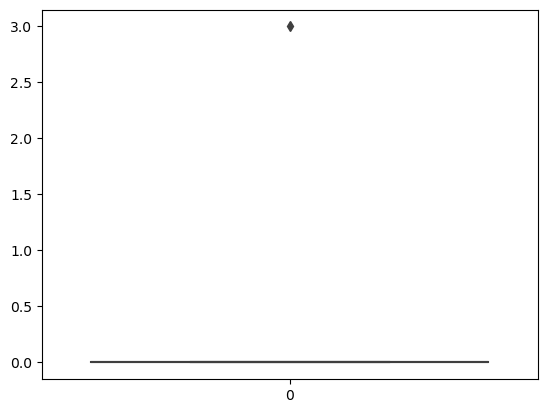

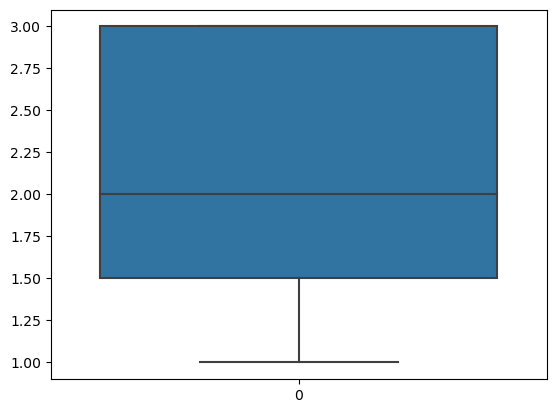

In [9]:
#cheacking for outliers

variables_cont = ['IMDB rating','metascore','Budget','Domestic Gross',
       'Total Gross','Opening Gross','Oscar Nomination','Oscar won',
       'Phase']
i = 1
for var in variables_cont:
 plt.figure(i)
 sns.boxplot(data[var])
 i += 1

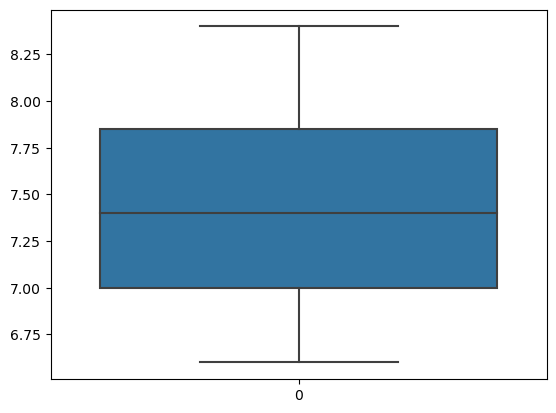

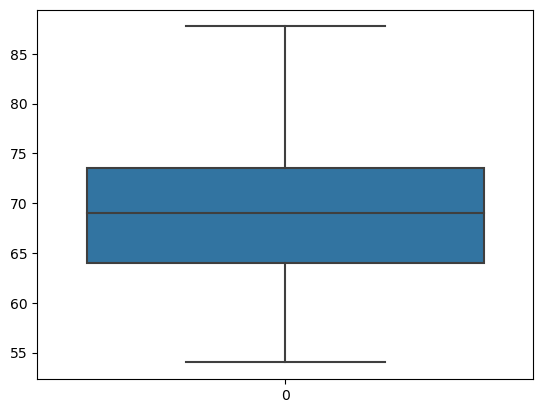

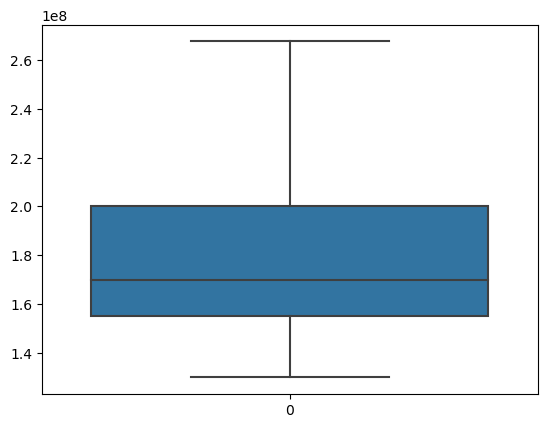

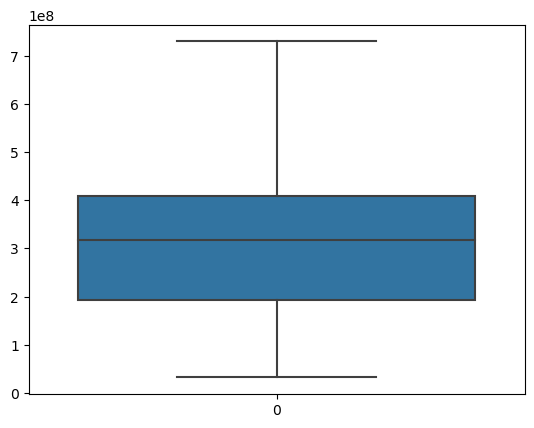

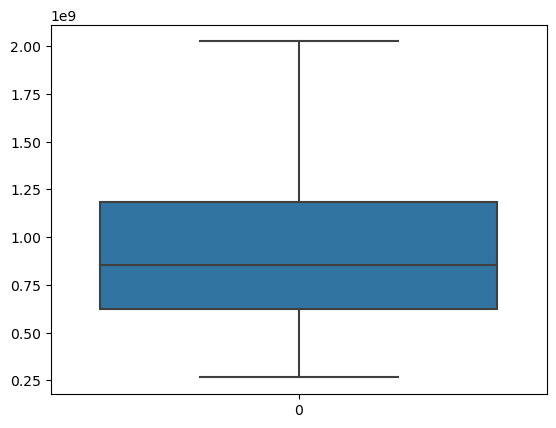

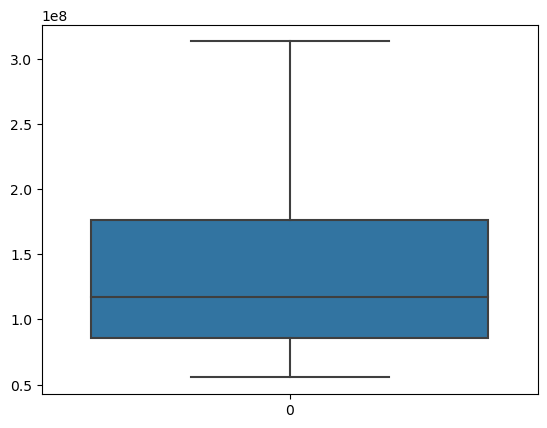

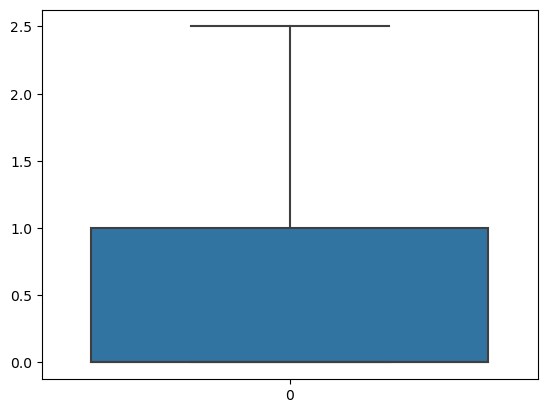

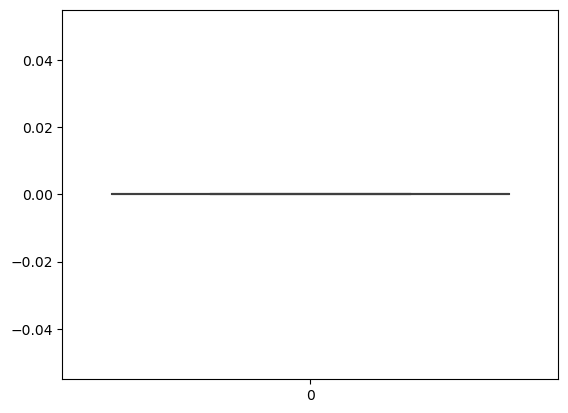

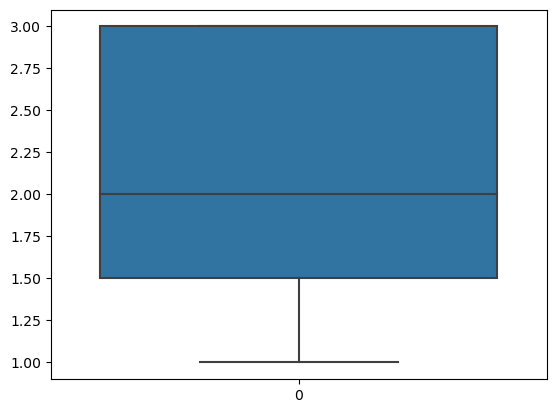

In [10]:
def treat_outlier(var):
 
 IQR = data[var].quantile(0.75) - data[var].quantile(0.25)
 lower_val = data[var].quantile(0.25) - (IQR * 1.5)
 upper_val = data[var].quantile(0.75) + (IQR * 1.5)
 data.loc[data[var] >= upper_val, var] = upper_val
 data.loc[data[var] <= lower_val, var] = lower_val
 
for var in variables_cont:
 treat_outlier(var)
 
import matplotlib.pyplot as plt
i = 1
for var in variables_cont:
 plt.figure(i)
 sns.boxplot(data[var])
 i += 1

### Data Cleaning

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              23 non-null     object 
 1   US release Date   23 non-null     object 
 2   Director          23 non-null     object 
 3   Producer          23 non-null     object 
 4   Duration          23 non-null     object 
 5   Genre             23 non-null     object 
 6   IMDB rating       23 non-null     float64
 7   metascore         23 non-null     float64
 8   Cast              23 non-null     object 
 9   Budget            23 non-null     float64
 10  Domestic Gross    23 non-null     float64
 11  Total Gross       23 non-null     float64
 12  Opening Gross     23 non-null     float64
 13  Oscar Nomination  23 non-null     float64
 14  Oscar won         23 non-null     int64  
 15  Phase             23 non-null     float64
dtypes: float64(8), int64(1), object(7)
memory usag

### Data Transformation

I transformed data types above to observe outliers

### Data Visualization

In [16]:
data.head()

,Name,US release Date,Director,Producer,Duration,Genre,IMDB rating,metascore,Cast,Budget,Domestic Gross,Total Gross,Opening Gross,Oscar Nomination,Oscar won,Phase
0,Iron Man,"May 2, 2008",Jon Favreau,Avi Arad and Kevin Feige,2h 6min,"Action , Adventure, Sci-Fi",7.9,79.0,"Robert Downey Jr. , Gweneth Paltrow , Terrence...",140000000.0,318604126.0,585366247.0,98618668.0,2.0,0,1.0
1,The incredible Hulk,"June 13, 2008",Louis Leterrier,"Avi Arad ,Gale Ann Hurd and Kevin Feige",1h 52min,"Action , Adventure, Sci-Fi",6.6,61.0,"Edward Norton , Liv Tyler , Tim Roth",150000000.0,134806913.0,264770996.0,55414050.0,0.0,0,1.0
2,Iron Man 2,"May 7, 2010",Jon Favreau,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",7.0,57.0,"Robert Downey Jr. , Gweneth Paltrow , Mickey R...",200000000.0,312433331.0,623933331.0,128122480.0,1.0,0,1.0
3,Thor,"May 6, 2011",Kenneth Branagh,Kevin Feige,1h 55min,"Action , Adventure, Fantasy",7.0,57.0,"Chris Hemsworth , Anthony Hopkins , Natalie Po...",150000000.0,181030624.0,449326618.0,65723338.0,0.0,0,1.0
4,Captain America: The first Avenger,"July 22, 2011",Joe Jhonston,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",6.9,66.0,"Chris Evans , Hugo Weaving , Samuel L. Jackson",140000000.0,176654505.0,370569774.0,65058524.0,0.0,0,1.0


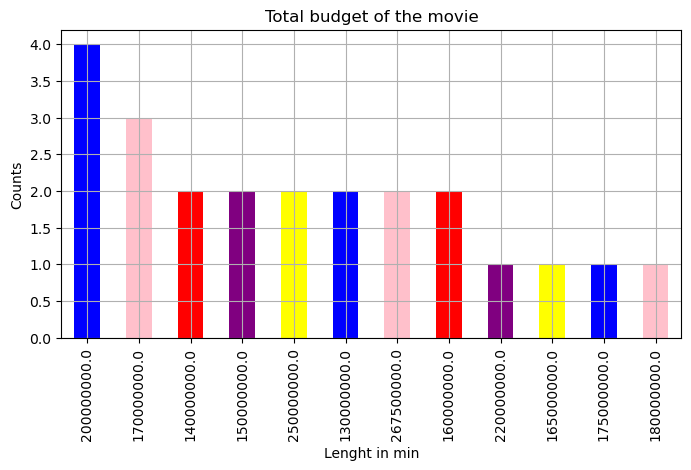

In [21]:
plt.figure(figsize=(8,4))
data['Budget'].value_counts().plot(kind='bar',color=['blue','pink','red','purple','yellow'])
plt.xlabel('Lenght in min')
plt.ylabel('Counts')
plt.title('Total budget of the movie')
plt.grid()
plt.show()

In [36]:
A= data.head(8)

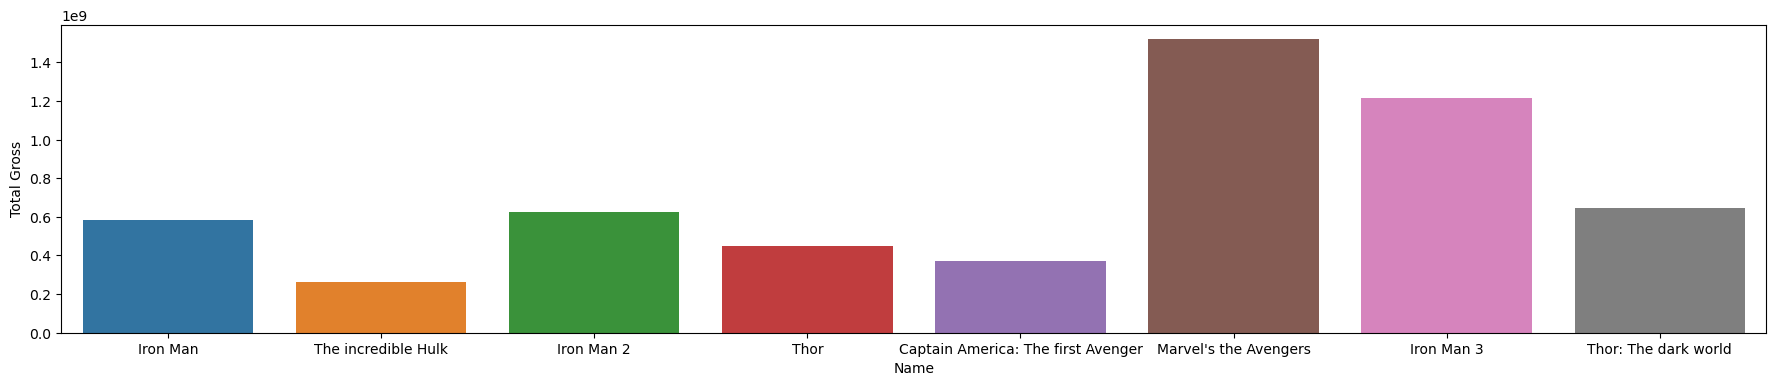

In [37]:
plt.figure(figsize=(22,4))
sns.barplot(data=A,x='Name',y='Total Gross')
plt.show()

Plotting the correlation 

In [38]:
data.corr()

C:\Users\thaku\AppData\Local\Temp\ipykernel_11448\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,IMDB rating,metascore,Budget,Domestic Gross,Total Gross,Opening Gross,Oscar Nomination,Oscar won,Phase
IMDB rating,1.000000,0.598457,0.571353,0.573083,0.633973,0.594893,0.442007,NaN,0.313267
metascore,0.598457,1.000000,0.208841,0.059397,0.363589,0.365081,0.576073,NaN,0.444622
Budget,0.571353,0.208841,1.000000,0.712855,0.850203,0.903598,0.186698,NaN,0.294027
Domestic Gross,0.573083,0.059397,0.712855,1.000000,0.790396,0.757789,0.125343,NaN,0.157069
Total Gross,0.633973,0.363589,0.850203,0.790396,1.000000,0.948284,0.247305,NaN,0.464519
Opening Gross,0.594893,0.365081,0.903598,0.757789,0.948284,1.000000,0.318787,NaN,0.361991
Oscar Nomination,0.442007,0.576073,0.186698,0.125343,0.247305,0.318787,1.000000,NaN,-0.045155
Oscar won,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Phase,0.313267,0.444622,0.294027,0.157069,0.464519,0.361991,-0.045155,NaN,1.000000


C:\Users\thaku\AppData\Local\Temp\ipykernel_11448\520712408.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


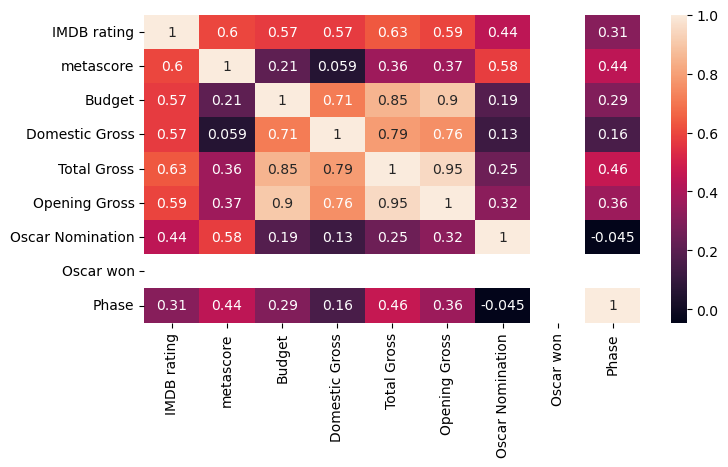

In [39]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(),annot=True)
plt.show()

Plot between Name and Genre

<Figure size 1200x400 with 0 Axes>

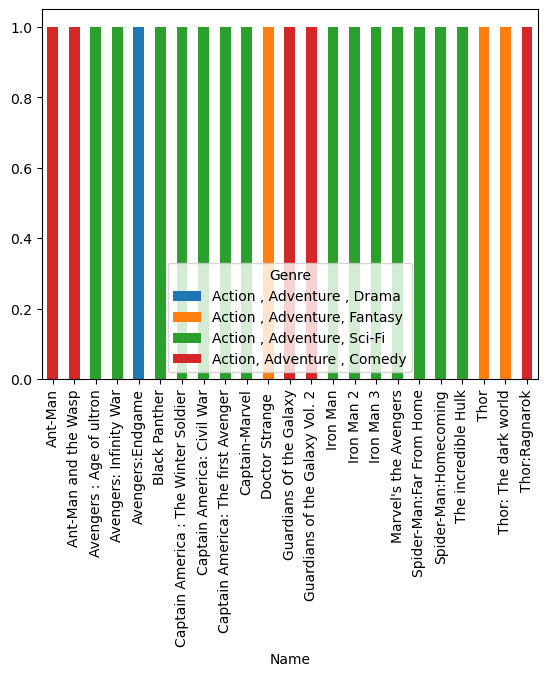

In [42]:
plt.figure(figsize=(12,4))
pd.crosstab(data['Name'],data['Genre']).plot(kind='bar',stacked=True);
plt.show()

Plot between Movie name and Oscar nomination

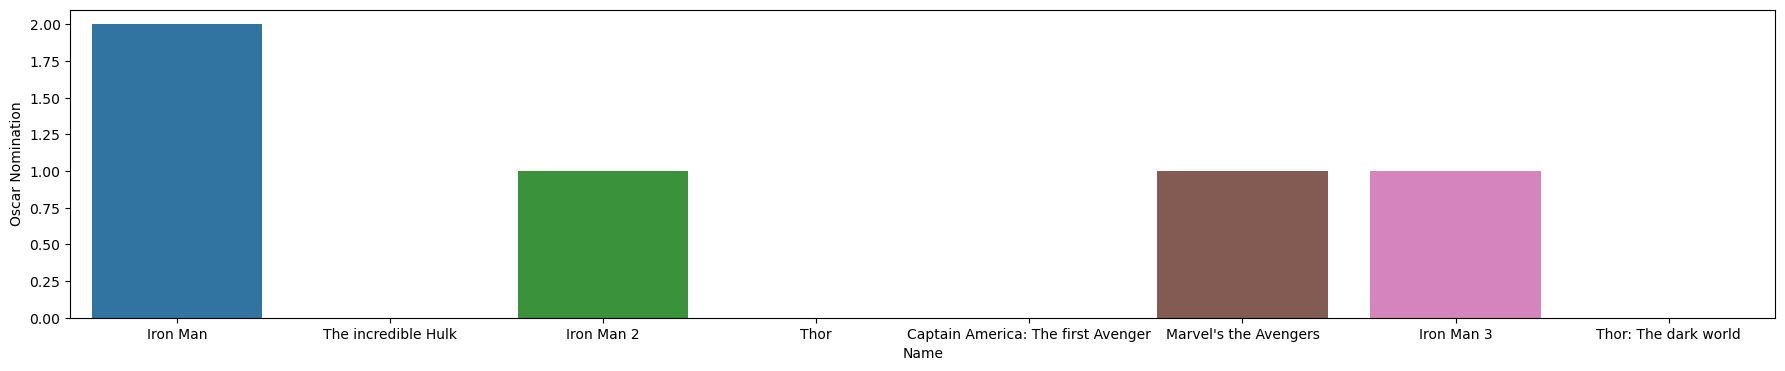

In [51]:
plt.figure(figsize=(22,4))
sns.barplot(data=A,x='Name',y='Oscar Nomination')
plt.show()

Plot between Movie name and opening gross

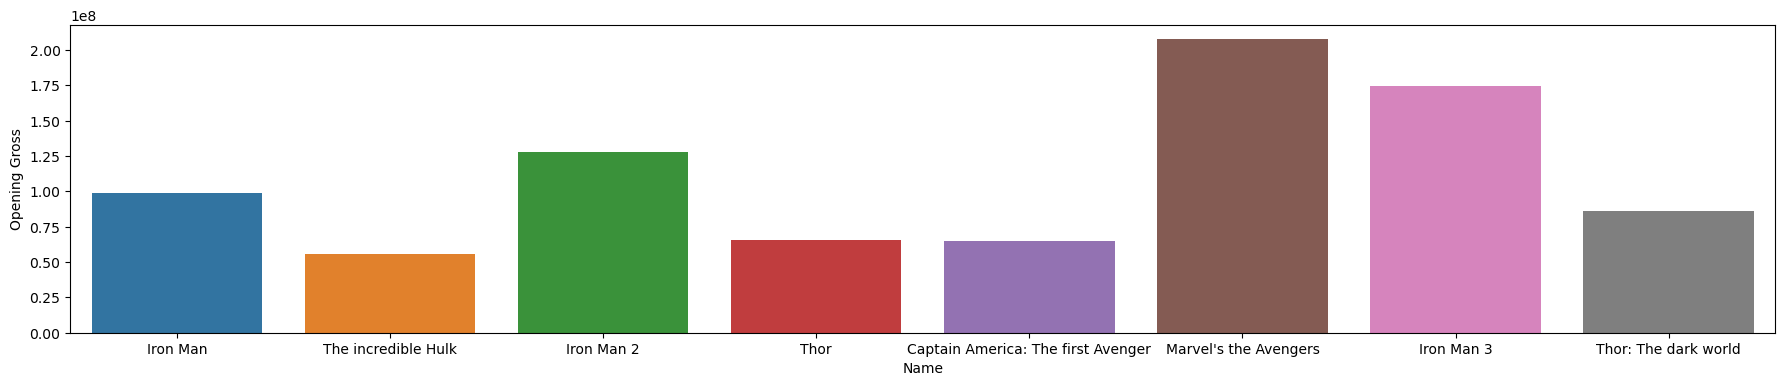

In [65]:
plt.figure(figsize=(22,4))
sns.barplot(data=A,x='Name',y='Opening Gross')
plt.show()